(150, 5)
Accuracy: 71.11%


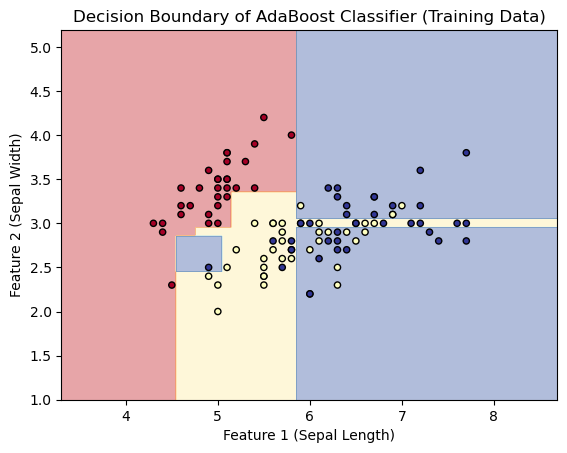

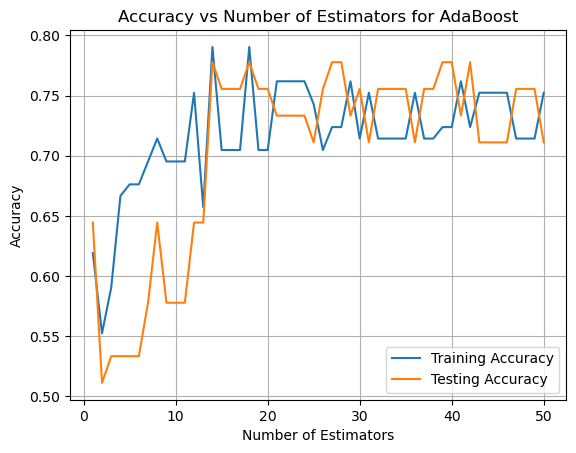

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv("iris_2.csv")
print(data.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1, random_state=42)
ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
def plot_decision_boundary(X, y, model, title):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.xlabel('Feature 1 (Sepal Length)')
    plt.ylabel('Feature 2 (Sepal Width)')
    plt.show()
plot_decision_boundary(X_train, y_train, ada_model, title="Decision Boundary of AdaBoost Classifier (Training Data)")
n_estimators_range = range(1, 51)
train_accuracies = []
test_accuracies = []

for n in n_estimators_range:
    ada_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n, learning_rate=1, random_state=42)
    ada_model.fit(X_train, y_train)
    
    train_accuracies.append(accuracy_score(y_train, ada_model.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, ada_model.predict(X_test)))
plt.plot(n_estimators_range, train_accuracies, label='Training Accuracy')
plt.plot(n_estimators_range, test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators for AdaBoost')
plt.legend()
plt.grid()
plt.show()